## Данный русский корпус текстов необходимо изначально предобрабатывать (например, в Mystem)

### Запустить на компьютере код ProjectSygma/programs/code.py (заменив your_path на путь к папке ProjectSygma


import glob
import os
import subprocess

file_list = glob.glob('your_path/ProjectSygma/texts/russian_literature/*/*')

for file_path in file_list:
    subprocess.run('your_path/ProjectSygma/mystem.exe -nwld ' +
                   file_path +
                   ' your_path/ProjectSygma/russian_corpus' +
                   file_path[file_path.rfind('\\'):])

### Сохранить ProjectSygma на  Google Drive и открыть Google Colab

## Технические моменты

### Подключение Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Установка пакетов

In [ ]:
!pip install spacy
!pip install gensim
!pip install pyLDAvis
!python -m spacy download en_core_web_lg
!pip install nolds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5dac4c26d93c857f2cdf50c07dc55a7e2deeb6346d65e5bd93a19f0ad03d7534
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400.7 MB 5.4 kB/s 
✔ Download and installati

In [ ]:
!unzip "/content/drive/MyDrive/english_literature-20220629T121103Z-001.zip" -d "/content/enlit/"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/enlit/english_literature/George Bernard Shaw/Maxims for Revolutionists(Essays).txt  
  inflating: /content/enlit/english_literature/George Bernard Shaw/Major Barbara(Plays).txt  
  inflating: /content/enlit/english_literature/George Bernard Shaw/Candida(Plays).txt  
  inflating: /content/enlit/english_literature/George Gissing/Demos  A Story of English Socialism(Fiction).txt  
  inflating: /content/enlit/english_literature/George Bernard Shaw/Mrs. Warren_s Profession(Plays).txt  
  inflating: /content/enlit/english_literature/George Bernard Shaw/Augustus Does His Bit(Plays).txt  
  inflating: /content/enlit/english_literature/George Bernard Shaw/John Bull_s Other Island(Plays).txt  
  inflating: /content/enlit/english_literature/Lord George Gordon Byron/On Chillon(Poetry).txt  
  inflating: /content/enlit/english_literature/Ralph Waldo Emerson/Waldeinsamkeit(Poetry)-May-Day and Other Pieces.txt  


## Обработка русского корпуса текстов

### Выкидывание слов которые не знает Mystem (последний символ - '?') и запись всех текстов в 1 массив

In [ ]:
import glob

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/russian_corpus/*'))
russian_corpus = []
for file_path in file_list:
    file = open(file_path, 'r', encoding='utf8'):
        russian_corpus.append([])
        for line in file:
            if (line[-2] != '?'):
                russian_corpus[-1].append(line[:-1])
    file.close()

SyntaxError: ignored

### Сохранение файла с текстами

In [ ]:
russian_corpus_file = open('/content/drive/My Drive/ProjectSygma/texts/russian_corpus.txt', 'w')
for item in russian_corpus:
    russian_corpus_file.write("%s\n" % item)
russian_corpus_file.close()

###Загрузка файла с текстами

In [ ]:
russian_corpus = []
russian_corpus_file = open('/content/drive/My Drive/ProjectSygma/texts/russian_corpus.txt', 'r')
for item in russian_corpus_file:
    russian_corpus.append(item[:-1])
russian_corpus_file.close()

### Создание матрицы тексты-слова

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,
                             lowercase=True,
                             token_pattern='[а-яА-Я0-9]{1,}'
                            )

data_vectorized = vectorizer.fit_transform(russian_corpus)
A = data_vectorized.toarray()
A = A.astype(float)

### Сохранение словаря

In [ ]:
russian_dictionary = vectorizer.get_feature_names()
russian_dictionary_file = open('/content/drive/My Drive/ProjectSygma/texts/russian_corpus.txt', 'w'))
for item in russian_dictionary:
    russian_dictionary_file.write("%s\n" % item)
russian_dictionary_file.close()

['арестовывать', 'без', 'бог', 'быть', 'ваш', 'вдруг', 'ведь', 'веселый', 'весь', 'вещь']


### Вычисление SVD-разложения (k - размерность центральной матрицы)

In [ ]:
import scipy

k = 5
u, s, vt = scipy.sparse.linalg.svds(A, k=k)

### Сохранение результатов(в файле rus_vtk.txt лежит нужная матрица, вместо k подставить число)

In [ ]:
s1 = s.tolist()
u1 = u.tolist()
vt1 = vt.tolist()
vt1_tr = list(map(list, zip(*vt1)))
f1 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'rus_s' + str(k) + '.txt', 'w')
f2 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'rus_u' + str(k) + '.txt', 'w')
f3 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'rus_vt' + str(k) + '.txt', 'w')
f4 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'rus_vt_tr' + str(k) + '.txt', 'w')

for line in s1:
    f1.write("%s " % line)
for line in u1:
    for row in line:
        f2.write("%s " % row)
    f2.write('\n') 
for line in vt1:
    for row in line:
        f3.write("%s " % row)
    f3.write('\n')
for line in vt1_tr:
    for row in line:
        f4.write("%s " % row)
    f4.write('\n') 
f1.close()
f2.close()
f3.close()
f4.close()

## Обработка английского корпуса текстов

###Ввод и объединение текстов в массив

In [ ]:
import glob
import tqdm
file_list = glob.glob('/content/enlit/english_literature/*/*')
corpus = []
names = []
for file_path in tqdm.tqdm(file_list):
    file = open(file_path, 'r')
    text = file.readlines()
    corpus.append(text)
    names.append(file_path)
    file.close()
corpus_final = []
for group in corpus:
    group = [i for i in group if i!='\n']
    for i in range(len(group)):  
        group[i] = group[i].rstrip('\n')
    l=0
    aux=''
    while(l!=len(group)):
        aux += (' ' + group[l])
        l=l+1
    corpus_final.append(aux)

100%|██████████| 11052/11052 [00:07<00:00, 1514.79it/s]


In [ ]:
names_old = [line.strip() for line in open('/content/drive/MyDrive/names_new.txt', 'r').readlines()]

In [ ]:
names_old = {names_old[i] : i for i in range(len(names_old))}

###Превращение текстов из строк в листы

In [ ]:
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), min_len=1, max_len=100))

In [ ]:
data_words = list(sent_to_words(corpus_final))

In [ ]:
corpus_final[8][:100]

' chapter 1 how it all began "we can hold out six months longer,--at least six months." my mother\'s t'

In [ ]:
import re
import en_core_web_lg
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won['’‘`]t", "will not", phrase)
    phrase = re.sub(r"can['’‘`]t", "can not", phrase)
    phrase = re.sub(r"ain['’‘`]t", "am not", phrase)

    # general
    phrase = re.sub(r"n['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]re", " are", phrase)
    phrase = re.sub(r"['’‘`]s", " is", phrase)
    phrase = re.sub(r"['’‘`]d", " would", phrase)
    phrase = re.sub(r"['’‘`]ll", " will", phrase)
    phrase = re.sub(r"['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]ve", " have", phrase)
    phrase = re.sub(r"['’‘`]m", " am", phrase)

    #phrase = re.sub('([.;!?])', r' \1 ', phrase)
    phrase = re.sub(r'[^\w.?!;]', ' ', phrase)
    phrase = re.sub(' +', ' ', phrase)
    sentences = re.split('([.;!?] *)', phrase)

    return ' '.join([i.capitalize() for i in  sentences])

In [ ]:
pr = prepare_english_text(corpus_final[8])

In [ ]:
pr[:100]

'  chapter ORDINAL1 how PRON1 all begin PRON1 can hold out ORDINAL1 month long at least ORDINAL1 mont'

In [ ]:
import gc

In [ ]:
prep_file = open('/content/drive/MyDrive/preprocess0.txt', 'r')

In [ ]:
prep_file.close()

4734 - 0

In [ ]:
#corpus_prep = []
import gc
prep_file = open('/content/drive/MyDrive/preprocess1.txt', 'w')
for i in tqdm.tqdm(range(len(corpus_final))):
  name = names[i]
  old_i = names_old[name]
  if old_i < 4733:
    continue
  prep_text = prepare_english_text(corpus_final[i])
  #corpus_prep.append(prep_text)
  prep_file.write('----------- TEXT ' + str(old_i) + ' -----------\n')
  prep_file.write(prep_text)
  prep_file.write('\n')
  gc.collect()
  if i % 100 == 0:
    prep_file.close()
    prep_file = open('/content/drive/MyDrive/preprocess1.txt', 'a')

100%|██████████| 11052/11052 [10:51:52<00:00,  3.54s/it]


In [ ]:

def prepare_english_text(raw_text):
    nlp = en_core_web_lg.load(disable=['parser'])
    nlp.max_length = 5000000
    pos_dict = {'PROPN': 'PERSON1', 'PRON': 'PRON1', 'NUM': 'ORDINAL1'}
    
    
    preprocessed_text = decontracted(raw_text)
    #preprocessed_list = gensim.utils.simple_preprocess(raw_text, min_len=1, max_len=100, deacc = True)
    #preprocessed_text  = ' '.join(preprocessed_list)
    
    new_nlp_doc = nlp(preprocessed_text)
    prepared_text = []
    for token in new_nlp_doc:
      if token.pos_ in pos_dict:
            prepared_text.append(pos_dict[token.pos_])
                    
                    
      elif token.pos_ != 'PUNCT':
            prepared_text.append(token.lemma_.lower())
                    

    return ' '.join(prepared_text)

###Лемматизация

In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg", disable=['parser', 'ner'])

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in tqdm.tqdm(texts):
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ for token in doc]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

nlp.max_length = 1000000000

In [ ]:

data_lemmatized = lemmatization(data_words)

###Сохранение файла с текстами

In [ ]:
english_corpus_file = open('/content/drive/My Drive/ProjectSygma/texts/english_corpus.txt', 'w')
for item in english_corpus:
    english_corpus_file.write("%s\n" % item)
english_corpus_file.close()

###Загрузка файла с текстами

In [ ]:
english_corpus = []
english_corpus_file = open('/content/drive/My Drive/ProjectSygma/texts/english_corpus.txt', 'r')
for item in english_corpus_file:
    english_corpus.append(item[:-1])
english_corpus_file.close()

###Создание матрицы слова-тексты

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,
                             lowercase=True,
                             token_pattern='[a-zA-z0-9]{1,}'
                            )

data_vectorized = vectorizer.fit_transform(english_corpus)
A = data_vectorized.toarray()
A = A.astype(float)

###Сохранение словаря

In [ ]:
english_dictionary = vectorizer.get_feature_names()
english_dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/english_dictionary.txt', 'w')
for item in english_dictionary:
    english_dictionary_file.write("%s\n" % item)
english_dictionary_file.close()

### Вычисление SVD-разложения (k - размерность центральной матрицы)

In [ ]:
from scipy.sparse.linalg import svds

k = 5
u, s, vt = svds(A, k=k)

### Сохранение результатов(в файле eng_vtk.txt лежит нужная матрица, вместо k подставить число)

In [ ]:
#s1 = s.tolist()
#u1 = u.tolist()
vt1 = vt.tolist()
vt1_tr = list(map(list, zip(*vt1)))
#f1 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'eng_s' + str(k) + '.txt', 'w')
#f2 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'eng_u' + str(k) + '.txt', 'w')
#f3 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'eng_vt' + str(k) + '.txt', 'w')
f4 = open('/content/drive/My Drive/ProjectSygma/tables/' + 'eng_vt_tr' + str(k) + '.txt', 'w')

#for line in s1:
#    f1.write("%s " % line)
#for line in u1:
#    for row in line:
#        f2.write("%s " % row)
#    f2.write('\n') 
#for line in vt1:
#    for row in line:
#        f3.write("%s " % row)
#    f3.write('\n') 
for line in vt1_tr:
    for row in line:
        f4.write("%s " % row)
    f4.write('\n') 
#f1.close()
#f2.close()
#f3.close()
f4.close()

## Исследование текста 

### Функции превращающие текст в хаотический ряд

In [ ]:
import gensim
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
from bisect import bisect_left 
  
def binary_search(a, x): 
    i = bisect_left(a, x) 
    if i != len(a) and a[i] == x: 
        return i 
    else: 
        return -1

def english_text_to_series(lit_text, dictionary, table):
    group = [i for i in lit_text if i!='\n']
    for i in range(len(group)):  
        [i] = group[i].rstrip('\n')
    l = 0
    final_text = ''
    while(l != len(group)):
        final_text += (' ' + group[l])
        l = l + 1
    words = gensim.utils.simple_preprocess(final_text, min_len=1, max_len=100)
    doc = nlp(' '.join(words)) 
    text = (' '.join([token.lemma_ for token in doc]))
    text_serie = []
    for word in text:
        word_index = binary_search(dictionary, word)
        if word_index != -1:
            word_vector = table[word_index]
            text_serie.append(word_vector)
    return text_serie


def russian_text_to_series(words, dictionary, table):
    # Считается что он уже обработан Mystem:
    # your_path/ProjectSygma/mystem.exe -nwld text_path your_path/ProjectSygma/texts/russian_text.txt
    # и лежит в text в виде списка слов
    text_serie = []
    for word in words:
        word_index = binary_search(dictionary, word)
        if word_index != -1:
            word_vector = table[word_index]
            text_serie.append(word_vector)
    return text_serie

### Функции, находящие меру энтропию и MPR-сложность

#### Вспомогательные функции

In [ ]:
import math

def get_split_index(A):
    i = len(A) - 1
    while i > 0:
        if A[i] < A[i - 1]:
            i -= 1
        else:
            break
    return i - 1


def get_change_index(A, i):
    j = len(A) - 1
    while j >= i:
        if A[j] > A[i]:
            break
        else:
            j -= 1
    return j


def swap(A, i, j):
    A[i], A[j] = (A[j], A[i])


# reverse A[start:]
def reverse(A, start):
    left = start
    right = len(A) - 1
    while left < right:
        swap(A, left, right)
        left += 1
        right -= 1


def next_permutation(A):
    split_index = get_split_index(A)
    # the Array is sorted in descreased order
    if split_index == -1:
        reverse(A, 0)
    else:
        change_index = get_change_index(A, split_index)
        swap(A, split_index, change_index)
        reverse(A, split_index + 1)


def factorial(n):
    ans = 1
    for i in range(2, n + 1):
        ans *= i
    return ans


def permutations(d=6):
    a = []
    for j in range(d):
        a.append(j + 1)
    perm = dict()
    perm[str(a)] = 0
    for j in range(factorial(d) - 1):
        next_permutation(a)
        perm[str(a)] = j + 1
    return perm


def s_max(d=6):
    return math.log(factorial(d))


def s_max_list(d=6):
    return [1 / factorial(d)] * factorial(d)


def pi(arr, d=6):
    pr = [0] * factorial(d)
    permutation_dict = permutations(d)
    for i in range(d - 1, len(arr)):
        curr = []
        curr_perm = []
        for j in range(i - d + 1, i + 1):
            curr.append([arr[j], len(curr) + 1])
        curr.sort()
        for k in curr:
            curr_perm.append(k[1])
        pr[permutation_dict[str(curr_perm)]] += 1
    for i in range(len(pr)):
        pr[i] /= len(arr) - d + 1
    return pr


def si(pr):
    entropy = 0
    for i in range(len(pr)):
        if pr[i] != 0:
            entropy -= pr[i] * math.log(pr[i])
    return entropy

def q_0_calculation(d=6):
    pr = [0] * factorial(d)
    pr[0] = 1
    b = s_max_list(d)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (si(b) - si(pr) / 2 - s_max(d) / 2)

def q_j(arr, d=6):
    pr = pi(arr, d)
    b = s_max_list(d)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation(d) * (si(b) - si(pr) / 2 - s_max(d) / 2)

#### Мера энтропии и MPR-сложность

In [ ]:
def entropy_measure(arr, d=6):
    return si(pi(arr, d))/s_max(d)

def mpr_complexity(arr, d=6):
    return q_j(arr, d) * entropy_measure(arr, d)

### Функции, находящие меру энтропию и MPR-сложность (многомерный случай)

#### Вспомогательные функции

In [ ]:
import math

def get_split_index_m(A):
    i = len(A) - 1
    while i > 0:
        if A[i] < A[i - 1]:
            i -= 1
        else:
            break
    return i - 1


def get_change_index_m(A, i):
    j = len(A) - 1
    while j >= i:
        if A[j] > A[i]:
            break
        else:
            j -= 1
    return j


def swap_m(A, i, j):
    A[i], A[j] = (A[j], A[i])


# reverse A[start:]
def reverse_m(A, start):
    left = start
    right = len(A) - 1
    while left < right:
        swap_m(A, left, right)
        left += 1
        right -= 1


def next_permutation_m(A, v):
    i = v - 1
    while i >= 0:
        split_index = get_split_index_m(A[i])
        # the Array is sorted in descreased order
        if split_index == -1:
            reverse_m(A[i], 0)
            i -= 1
        else:
            change_index = get_change_index_m(A[i], split_index)
            swap_m(A[i], split_index, change_index)
            reverse_m(A[i], split_index + 1)
            break


def factorial_m(n):
    ans = 1
    for i in range(2, n + 1):
        ans *= i
    return ans


def permutations_m(d, v):
    a = []
    for i in range(v):
        a.append([])
        for j in range(d):
            a[-1].append(j + 1)
    perm = dict()
    perm[str(a)] = 0
    for j in range(factorial_m(d) ** v - 1):
        next_permutation_m(a, v)
        perm[str(a)] = j + 1
    return perm


def s_max_m(d, v):
    return math.log(factorial_m(d) ** v)


def s_max_list_m(d, v):
    return [1 / (factorial_m(d) ** v)] * (factorial_m(d) ** v)


def p_m(arr, d, v):
    pr = [0] * (factorial_m(d) ** v)
    permutation_dict = permutations_m(d, v)
    for i in range(d - 1, len(arr)):
        full_curr_perm = []
        for l in range(v):
            curr = []
            for j in range(i - d + 1, i + 1):
                curr.append([arr[j][l], len(curr) + 1])
            curr.sort()
            curr_perm = []
            for k in curr:
                curr_perm.append(k[1])
            full_curr_perm.append(curr_perm)
        pr[permutation_dict[str(full_curr_perm)]] += 1
    for i in range(len(pr)):
        pr[i] /= len(arr) - d + 1
    return pr


def s_m(pr):
    entropy = 0
    for i in range(len(pr)):
        if pr[i] != 0:
            entropy -= pr[i] * math.log(pr[i])
    return entropy

def q_0_calculation_m(d, v):
    pr = [0] * (factorial_m(d) ** v)
    pr[0] = 1
    b = s_max_list_m(d, v)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (s_m(b) - s_m(pr) / 2 - s_max_m(d, v) / 2)

def q_j_m(arr, d, v):
    pr = p_m(arr, d, v)
    b = s_max_list_m(d, v)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation_m(d, v) * (s_m(b) - s_m(pr) / 2 - s_max_m(d, v) / 2)

#### Мера энтропии и MPR-сложность

In [ ]:
def entropy_measure_m(arr, d=3, v=2):
    return s_m(p_m(arr, d, v))/s_max_m(d, v)

def mpr_complexity_m(arr, d=3, v=2):
    return q_j_m(arr, d, v) * entropy_measure_m(arr, d, v)

In [ ]:
def s_max_alt(pr):
    return math.log(len(pr))

def s_max_list_alt(pr):
    return [1 / len(pr)] * len(pr)

def q_0_calculation_alt(pr):
    i_pr = [0] * len(pr)
    i_pr[0] = 1
    b = s_max_list_alt(pr)
    b = [i_pr + b for i_pr, b in zip(i_pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (s(b) - s(i_pr) / 2 - s_max_alt(pr) / 2)

def q_j_alt(pr):
    b = s_max_list_alt(pr)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation_alt(pr) * (s(b) - s(pr) / 2 - s_max_alt(pr) / 2)

def entropy_measure_alt(pr):
    return s(pr)/s_max_alt(pr)

def mpr_complexity_alt(pr):
    return q_j_alt(pr) * entropy_measure_alt(pr)

### Функция, вычисляющая старший показатель Ляпунова

In [ ]:
import nolds

In [ ]:
import numpy as np


def rowwise_euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2, axis=1))


def delay_embedding(data, emb_dim, lag=1):
    data = np.asarray(data)
    min_len = (emb_dim - 1) * lag + 1
    m = len(data) - min_len + 1
    indices = np.repeat([np.arange(emb_dim) * lag], m, axis=0)
    indices += np.arange(m).reshape((m, 1))
    return data[indices]


def lyap_r_len(**kwargs):
    min_len = (kwargs['emb_dim'] - 1) * kwargs['lag'] + 1
    min_len += kwargs['trajectory_len'] - 1
    min_len += kwargs['min_tsep'] * 2 + 1
    return min_len


def lyap_r(data,
           emb_dim=10,
           lag=None,
           min_tsep=None,
           tau=1,
           min_neighbors=20,
           trajectory_len=20,
           debug_data=False,
           fit_offset=0):
    data = np.asarray(data, dtype="float32")
    n = len(data)
    max_tsep_factor = 0.25
    if lag is None or min_tsep is None:
        # both the algorithm for lag and min_tsep need the fft
        f = np.fft.rfft(data, n * 2 - 1)
    if min_tsep is None:
        # calculate min_tsep as mean period (= 1 / mean frequency)
        mf = np.fft.rfftfreq(n * 2 - 1) * np.abs(f)
        mf = np.mean(mf[1:]) / np.sum(np.abs(f[1:]))
        min_tsep = int(np.ceil(1.0 / mf))
        if min_tsep > max_tsep_factor * n:
            min_tsep = int(max_tsep_factor * n)
            print("signal has very low mean frequency")
    if lag is None:
        acorr = np.fft.irfft(f * np.conj(f))
        acorr = np.roll(acorr, n - 1)
        eps = acorr[n - 1] * (1 - 1.0 / np.e)
        lag = 1
        def nb_neighbors(lag_value):
            min_len = lyap_r_len(
                emb_dim=emb_dim,
                lag=lag_value,
                trajectory_len=trajectory_len,
                min_tsep=min_tsep
            )
            return max(0, n - min_len)
        for i in range(1, n):
            lag = i
            if acorr[n - 1 + i] < eps or acorr[n - 1 - i] < eps:
                break
            if nb_neighbors(i) < min_neighbors:
                print("autocorrelation declined too slowly to find suitable lag")
                break
    min_len = lyap_r_len(
        emb_dim=emb_dim,
        lag=lag,
        trajectory_len=trajectory_len,
        min_tsep=min_tsep
    )
    orbit = delay_embedding(data, emb_dim, lag)
    m = len(orbit)
    dists = np.array([rowwise_euclidean(orbit, orbit[i]) for i in range(m)])
    for i in range(m):
        dists[i, max(0, i - min_tsep):i + min_tsep + 1] = float("inf")

    ntraj = m - trajectory_len + 1
    nb_idx = np.argmin(dists[:ntraj, :ntraj], axis=1)

    div_traj = np.zeros(trajectory_len, dtype=float)
    for k in range(trajectory_len):
        indices = (np.arange(ntraj) + k, nb_idx + k)
        div_traj_k = dists[indices]
        nonzero = np.where(div_traj_k != 0)
        if len(nonzero[0]) == 0:
            div_traj[k] = -np.inf
        else:
            div_traj[k] = np.mean(np.log(div_traj_k[nonzero]))
    ks = np.arange(trajectory_len)
    finite = np.where(np.isfinite(div_traj))
    ks = ks[finite]
    div_traj = div_traj[finite]
    if len(ks) < 1:
        poly = [-np.inf, 0]
    else:
        poly = np.polyfit(ks[fit_offset:], div_traj[fit_offset:], 1)
    le = poly[0] / tau
    if debug_data:
        return (le, (ks, div_traj, poly))
    else:
        return le

### Вычисление для текста

In [ ]:
words_file = open('/content/drive/My Drive/ProjectSygma/texts/voina_i_mir.txt', 'r')
words = []
for line in words_file:
    if (line[-2] != '?'):
        words.append(line[:-1])
words_file.close()

dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/russian_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])
table = []

d = 4
v = 5
table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr' + str(v) + '.txt', 'r')
for line in table_file:
    table.append(list(map(float, line[:-2].split())))
# table = list(map(list, zip(*table))) #transpose table


text_serie = russian_text_to_series(words, dictionary, table)
print(entropy_measure_m(text_serie, d=d, v=v))
print(mpr_complexity_m(text_serie, d=d, v=v))
#print(q_j_m(text_serie, d=d, v=v))
#print(s_max_m(d=d, v=v))
#print(q_0_calculation_m(d=d, v=v))
alpha = p_m(text_serie, 4, 5)
al = open('/content/drive/My Drive/ProjectSygma/tables/mpr.txt', 'w')
for i in alpha:
    al.write("%s\n" % i)
al.close()
#print(entropy_measure_alt(p_m(text_serie, 4, 5)))
#print(mpr_complexity_alt(p_m(text_serie, 4, 5)))
# print(lyap_r(text_serie))

1.0000000000010336
0.711099265629664
1.0000000000010336
1.0000000000010336
0.6733165488251192
1.0000000000010336


In [ ]:
def seq_4_1(x, y, z):
    ans = []
    if 1:
        t = 0
        o = 10
        b = 8 / 3
        r = 28
        h = 0.1

        def func_x(x, y, z, t):
            return o * (y - x)

        def func_y(x, y, z, t):
            return x * (r - z) - y

        def func_z(x, y, z, t):
            return x * y - b * z

        while t < 3000:
            kx1 = h * func_x(x, y, z, t)
            ky1 = h * func_y(x, y, z, t)
            kz1 = h * func_z(x, y, z, t)

            kx2 = h * func_x(x + kx1 / 2, y + ky1 / 2, z + kz1 / 2, t + h / 2)
            ky2 = h * func_y(x + kx1 / 2, y + ky1 / 2, z + kz1 / 2, t + h / 2)
            kz2 = h * func_z(x + kx1 / 2, y + ky1 / 2, z + kz1 / 2, t + h / 2)

            kx3 = h * func_x(x + kx2 / 2, y + ky2 / 2, z + kz2 / 2, t + h / 2)
            ky3 = h * func_y(x + kx2 / 2, y + ky2 / 2, z + kz2 / 2, t + h / 2)
            kz3 = h * func_z(x + kx2 / 2, y + ky2 / 2, z + kz2 / 2, t + h / 2)

            kx4 = h * func_x(x + kx3, y + ky3, z + kz3, t + h)
            ky4 = h * func_y(x + kx3, y + ky3, z + kz3, t + h)
            kz4 = h * func_z(x + kx3, y + ky3, z + kz3, t + h)

            x += (kx1 + 2 * kx2 + 2 * kx3 + kx4) / 6
            y += (ky1 + 2 * ky2 + 2 * ky3 + ky4) / 6
            z += (kz1 + 2 * kz2 + 2 * kz3 + kz4) / 6
            t += h

            ans.append(x)
    return ans

def seq_1(x, a=4):
    ans = []
    ans.append(x)
    for i in range(1000 - 1):
        x = a * x * (1 - x)
        ans.append(x)
    return ans

print(entropy_measure(seq_1(0.1)))
print(mpr_complexity(seq_1(0.1)))


0.6281691662528004
0.4855517918176623


In [ ]:
f = open("/usr/local/lib/python3.6/dist-packages/nolds/measures.py", "r")
f1 = open("/content/drive/My Drive/1.txt", "w")
for i in f:
    f1.write(i)
f.close()
f1.close()

## Поиск границ

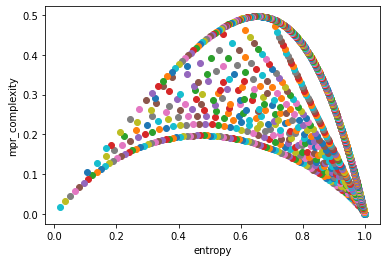

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 720
def entropy_measure(arr):
    return s(arr)/math.log(N)

def q_0_calculation(N=N):
    pr = [0] * N
    pr[0] = 1
    b = [1 / N] * N
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (s(b) - s(pr) / 2 - math.log(N) / 2)


def q_j(pr, N=N, q0=q_0_calculation(N=N)):
    b = [1 / N] * N
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q0 * (s(b) - s(pr) / 2 - math.log(N) / 2)

def mpr_complexity(arr, N):
    return q_j(arr, N) * entropy_measure(arr)

prob_list = []
for i in range (0, 100):
    prob_list.append(i / 100)
m = 0
for n in range (0, N - m - 1):
    for p in prob_list:
        if (p * n < 1):
            distr =  [0] * m + [p] * n + [(1 - p * n) / (N - m - n)] * (N - m - n)
            plt.scatter(entropy_measure(distr), mpr_complexity(distr, N))
plt.xlabel('entropy')
plt.ylabel('mpr_complexity')
plt.show()

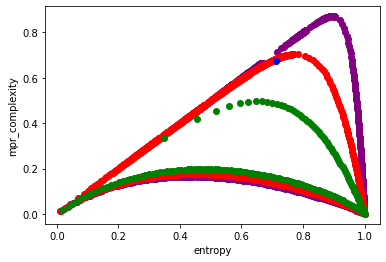

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


def s_alt(N, p, m, n):
    if p != 0:
        return -(n * p * math.log(p) + (N - m - n) * (1 - p * n) / (N - m - n) * math.log((1 - p * n) / (N - m - n)))
    else:
        return -(N - m - n) * (1 - p * n) / (N - m - n) * math.log((1 - p * n) / (N - m - n))

def s_alt_1(N, p, m, n):
    return -(m / N * math.log(1 / N) + n * (p + 1 / N) / 2 * math.log((p + 1 / N) / 2) + (N - m - n) * ((1 - p * n) / (N - m - n) + 1 / N) / 2 * math.log((((1 - p * n) / (N - m - n)) + 1 / N) / 2))

def entropy_measure(N, p, m, n):
    return s_alt(N, p, m, n) / math.log(N)

def q_0_calculation(N, p, m, n):
    return 1 / (s_alt(N, 1 / 2 / N, 0, N - 1) - math.log(N) / 2)


def q_j(N, p, m, n):
    return q_0_calculation(N, p, m, n) * (s_alt_1(N, p, m, n) - s_alt(N, p, m, n) / 2 - math.log(N) / 2)

def mpr_complexity(N, p, m, n):
    return q_j(N, p, m, n) * entropy_measure(N, p, m, n)

m = 0
N = 1000000000000000000000
p = 0
n = 0
max_compl = 0
for n in range (0, N - m - 1, 10000000000000000000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")
for n in range (N - m - 10000000000000000000, N - m - 1, 100000000000000000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")
for n in range (N - m - 100000000000000000, N - m - 1, 1000000000000000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")
for n in range (N - m - 100000000000000, N - m - 1, 1000000000000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")
for n in range (N - m - 10000000000000, N - m - 1, 100000000000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")
for n in range (N - m - 1000000000000, N - m - 1, 10000000000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")   
n = 1
while p < 0.99:
    p += 0.01
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="purple")

N = 7962624
p = 0
n = 0
for n in range (0, N - m - 1, 100000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="red")
for n in range (N - m - 200000, N - m - 1, 1000):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="red")
for n in range (N - m - 20000, N - m - 1, 100):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="red")
for n in range (N - m - 2000, N - m - 1, 10):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="red")
for n in range (N - m - 200, N - m - 1, 1):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="red")   
n = 1
while p < 0.99:
    p += 0.01
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="red")

N = 720
p = 0
n = 0
for n in range (0, N - m - 1, 10):
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="green")
n = 1
while p < 0.99:
    p += 0.01
    plt.scatter(entropy_measure(N, p, m, n), mpr_complexity(N, p, m, n), c="green")

plt.scatter(0.711, 0.673, c="blue")
plt.xlabel('entropy')
plt.ylabel('mpr_complexity')
plt.show()

# 1

2
0.6931471596229369 0.346573548405955 0.34657359027997264
6
1.7915991255560013 0.8955579537685097 0.8958797346140275
24
3.177208418991025 1.58734152584987 1.5890269151739729
120
4.785466594085005 2.389715378318881 2.393745871391023


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

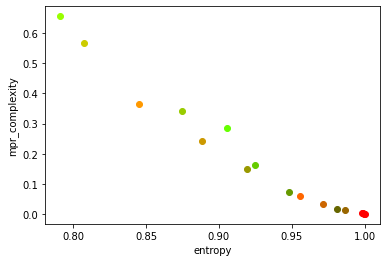

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/russian_dictionary.txt', 'r')
n = 1
for k in range (n):
    words_file = open('/content/drive/My Drive/ProjectSygma/texts/voina_i_mir.txt', 'r')
    words = []
    for line in words_file:
        if (line[-2] != '?'):
            words.append(line[:-1])
    words_file.close()
    dictionary = []
    for line in dictionary_file:
        dictionary.append(line[:-1])
    table = []
    for i in range (1, 6):
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = russian_text_to_series(words, dictionary, table)
        for j in range (2, 6):
            if i == 1:
                plt.scatter(
                entropy_measure(text_serie, d=j),
                mpr_complexity(text_serie, d=j), c="red")
            elif i + j < 9:
                plt.scatter(
                entropy_measure_m(text_serie, d=j, v=i),
                mpr_complexity_m(text_serie, d=j, v=i), c =[i/5,j/5,0])
        dictionary_file.close()
plt.xlabel('entropy')
plt.ylabel('mpr_complexity')
plt.show()

[-3.476194346126353e-07]
<class 'function'>
<class 'list'>
<class 'int'>
<class 'function'>
<class 'list'>
<class 'int'>
<class 'function'>
<class 'list'>
<class 'int'>
<class 'function'>
<class 'list'>
<class 'int'>
[4.648915276226808e-07, 3.476194346126352e-07]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[3.981136135436475e-06, 4.648915276226773e-07, 3.4761943461263526e-07]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[-3.816384278974419e-06, -3.9811361354363255e-06, 4.648915276226789e-07, 3.47619434612635e-07]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[-1.0847890304829603e-05, 3.816384278974427e-06, 3.9811361354363145e-06, -4.6489152762268003e-07, -3.4761943461263516e-07]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


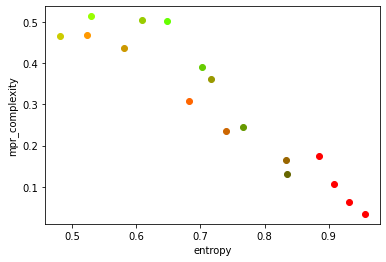

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/english_dictionary.txt', 'r')
n = 1
for k in range (n):
    text_file = open('/content/drive/My Drive/ProjectSygma/texts/war_and_piece.txt', 'r')
    text = text_file.read()
    dictionary = []
    for line in dictionary_file:
        dictionary.append(line[:-1])
    table = []
    for i in range (1, 6):
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/eng_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = english_text_to_series(lem_text, dictionary, table)
        print(text_serie[0])
        for j in range (2, 6):
            if i == 1:
                plt.scatter(
                entropy_measure(text_serie, d=j),
                mpr_complexity(text_serie, d=j), c="red")
            elif i + j < 9:
                plt.scatter(
                entropy_measure_m(text_serie, d=j, v=i),
                mpr_complexity_m(text_serie, d=j, v=i), c =[i/5,j/5,0])
        dictionary_file.close()
plt.xlabel('entropy')
plt.ylabel('mpr_complexity')
plt.show()